In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("/Users/ayangedleh/Desktop/datacollection/Data/Data to Clean/retailarticles YTD (new)_merged.csv", encoding= "ISO-8859-1")
df.head()

,Category,Index,title,description,url,date,content,source,Retail Relevance,Economy Relevance
0,0,1,Trump Doesn't Have a Best-and-Brightest Proble...,Bloomberg Trump Doesn't Have a Best-and-Bright...,https://www.bloomberg.com/view/articles/2018-0...,2018-03-06T15:55:43Z,Way back in 2015 shortly after Donald Trump an...,"{'id': 'bloomberg', 'name': 'Bloomberg'}",0,0
1,1,2,Lowe's Starts Searching for a New CEO,"Lowe's Cos., under pressure to match the perfo...",https://www.bloomberg.com/news/articles/2018-0...,2018-03-26T13:26:08Z,Lowes Cos under pressure to match the performa...,"{'id': 'bloomberg', 'name': 'Bloomberg'}",1,0
2,1,3,Lowe's Activist Believes Stock Value Could Triple,The activist investor targeting Lowe's Cos. be...,https://www.bloomberg.com/news/articles/2018-0...,2018-01-19T14:56:16Z,The activist investor targeting Lowes Cos beli...,"{'id': 'bloomberg', 'name': 'Bloomberg'}",1,0
3,1,4,Ackman Sees Lowe's Upside Like His 2011 Bet on...,Bill Ackman said he sees significant upside fo...,https://www.bloomberg.com/news/articles/2018-0...,2018-08-09T22:13:10Z,Bill Ackman said he sees significant upside fo...,"{'id': 'bloomberg', 'name': 'Bloomberg'}",1,0
4,0,5,Financial goals: Millennial women may be on co...,Millennial women seriously lag men in their fi...,https://www.cnbc.com/2018/08/08/millennial-wom...,2018-08-11T12:00:08Z,While millennials might be all grown up a lot ...,"{'id': 'cnbc', 'name': 'CNBC'}",0,0


In [3]:
col = ['category','content', 'pub_date']
df = df[col]

In [30]:
df = df[pd.notnull(df['content'])]
df.columns = ['category', 'content','pub_date']
df.head()

ValueError: Length mismatch: Expected axis has 11 elements, new values have 3 elements

In [23]:
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
df.head()

,Category,Index,title,description,url,date,content,source,Retail Relevance,Economy Relevance,category_id
0,0,1,Trump Doesn't Have a Best-and-Brightest Proble...,Bloomberg Trump Doesn't Have a Best-and-Bright...,https://www.bloomberg.com/view/articles/2018-0...,2018-03-06T15:55:43Z,Way back in 2015 shortly after Donald Trump an...,"{'id': 'bloomberg', 'name': 'Bloomberg'}",0,0,0
1,1,2,Lowe's Starts Searching for a New CEO,"Lowe's Cos., under pressure to match the perfo...",https://www.bloomberg.com/news/articles/2018-0...,2018-03-26T13:26:08Z,Lowes Cos under pressure to match the performa...,"{'id': 'bloomberg', 'name': 'Bloomberg'}",1,0,1
2,1,3,Lowe's Activist Believes Stock Value Could Triple,The activist investor targeting Lowe's Cos. be...,https://www.bloomberg.com/news/articles/2018-0...,2018-01-19T14:56:16Z,The activist investor targeting Lowes Cos beli...,"{'id': 'bloomberg', 'name': 'Bloomberg'}",1,0,1
3,1,4,Ackman Sees Lowe's Upside Like His 2011 Bet on...,Bill Ackman said he sees significant upside fo...,https://www.bloomberg.com/news/articles/2018-0...,2018-08-09T22:13:10Z,Bill Ackman said he sees significant upside fo...,"{'id': 'bloomberg', 'name': 'Bloomberg'}",1,0,1
4,0,5,Financial goals: Millennial women may be on co...,Millennial women seriously lag men in their fi...,https://www.cnbc.com/2018/08/08/millennial-wom...,2018-08-11T12:00:08Z,While millennials might be all grown up a lot ...,"{'id': 'cnbc', 'name': 'CNBC'}",0,0,0


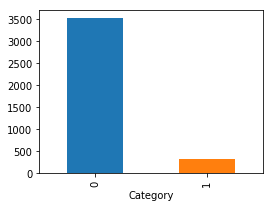

In [26]:
fig = plt.figure(figsize=(4,3))
df.groupby('Category').content.count().plot.bar(ylim=0)
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = vector.fit_transform(df.content).toarray()
labels = df.category_id
features.shape


(3845, 1121068)

In [29]:
from sklearn.feature_selection import chi2
import numpy as np
N = 50

for category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(vector.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(category))
    print("  . Most correlated unigrams:\n {}".format('\n '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n '.join(bigrams[-N:]))) 


# '0':
  . Most correlated unigrams:
 xrt
 hudsons
 lowes
 athletica
 athletic
 shares
 mall
 nike
 outfitters
 chains
 offprice
 namesake
 fashion
 abercrombie
 items
 holiday
 clothing
 potdevin
 banana
 brickandmortar
 chain
 shopping
 jcrew
 online
 amazoncom
 walmarts
 jc
 athleta
 kohls
 amazons
 nordstrom
 navy
 penney
 macys
 peck
 lululemon
 samestore
 sales
 ecommerce
 retail
 brand
 amazon
 store
 brands
 walmart
 apparel
 retailer
 shoppers
 retailers
 stores
  . Most correlated bigrams:
. sales gap
 laurent potdevin
 ralph lauren
 mr potdevin
 globaldata retail
 quarter ended
 shopping season
 gap gps
 ceo art
 gap amazon
 mickey drexler
 neil saunders
 retail sector
 amp taylor
 stitch fix
 holiday shopping
 company said
 tj maxx
 glenn murphy
 strong holiday
 lord amp
 apparel retailer
 target corp
 eagle outfitters
 tesla shares
 traditional retailers
 american eagle
 peck said
 hudsons bay
 cyber monday
 home depot
 gap incs
 lululemon athletica
 namesake brand
 art pe